<a href="https://www.kaggle.com/code/utkarshx27/health-income-outcomes-of-oecd-opec-countries?scriptVersionId=128931387" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/health-and-income-outcomes/gapminder.csv
/kaggle/input/text-files-related-to-national-anthem-clustering/11.png
/kaggle/input/text-files-related-to-national-anthem-clustering/all.png
/kaggle/input/text-files-related-to-national-anthem-clustering/14.png
/kaggle/input/text-files-related-to-national-anthem-clustering/stopwords_scrapmaker.txt
/kaggle/input/text-files-related-to-national-anthem-clustering/nationalities.txt
/kaggle/input/text-files-related-to-national-anthem-clustering/world-countries.json
/kaggle/input/text-files-related-to-national-anthem-clustering/12.png
/kaggle/input/text-files-related-to-national-anthem-clustering/national_anthems.csv
/kaggle/input/text-files-related-to-national-anthem-clustering/15.png
/kaggle/input/text-files-related-to-national-anthem-clustering/13.png
/kaggle/input/text-files-related-to-national-anthem-clustering/countries.txt


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
df = pd.read_csv('/kaggle/input/health-and-income-outcomes/gapminder.csv')
df

,Unnamed: 0,country,year,infant_mortality,life_expectancy,fertility,population,gdp,continent,region
0,1,Albania,1960,115.40,62.87,6.19,1636054.0,NaN,Europe,Southern Europe
1,2,Algeria,1960,148.20,47.50,7.65,11124892.0,1.382815e+10,Africa,Northern Africa
2,3,Angola,1960,208.00,35.98,7.32,5270844.0,NaN,Africa,Middle Africa
3,4,Antigua and Barbuda,1960,NaN,62.97,4.43,54681.0,NaN,Americas,Caribbean
4,5,Argentina,1960,59.87,65.39,3.11,20619075.0,1.083223e+11,Americas,South America
...,...,...,...,...,...,...,...,...,...,...
10540,10541,West Bank and Gaza,2016,NaN,74.70,NaN,NaN,NaN,Asia,Western Asia
10541,10542,Vietnam,2016,NaN,75.60,NaN,NaN,NaN,Asia,South-Eastern Asia
10542,10543,Yemen,2016,NaN,64.92,NaN,NaN,NaN,Asia,Western Asia
10543,10544,Zambia,2016,NaN,57.10,NaN,NaN,NaN,Africa,Eastern Africa


In [4]:
df.isnull().sum()

Unnamed: 0             0
country                0
year                   0
infant_mortality    1453
life_expectancy        0
fertility            187
population           185
gdp                 2972
continent              0
region                 0
dtype: int64

In [5]:
df.drop('Unnamed: 0', axis=1, inplace=True)
df = df.dropna()

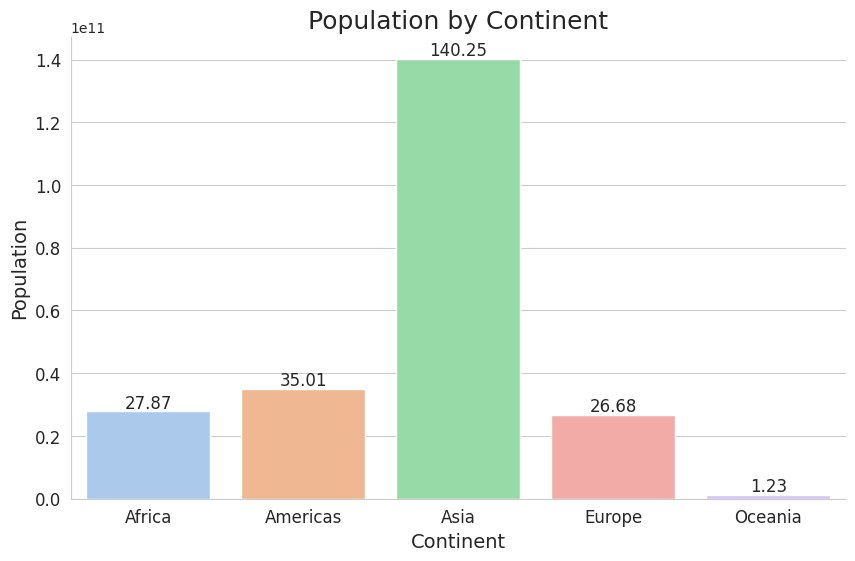

In [6]:
continent_data = df.groupby('continent')['population'].sum()
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
ax = sns.barplot(x=continent_data.index, y=continent_data.values, palette='pastel')
plt.title('Population by Continent', fontsize=18)
plt.xlabel('Continent', fontsize=14)
plt.ylabel('Population', fontsize=14)

ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)

for i, v in enumerate(continent_data.values):
    ax.text(i, v+1e9, f'{v/1e9:.2f}', ha='center', fontsize=12)

sns.despine(right=True, top=True)
plt.show()

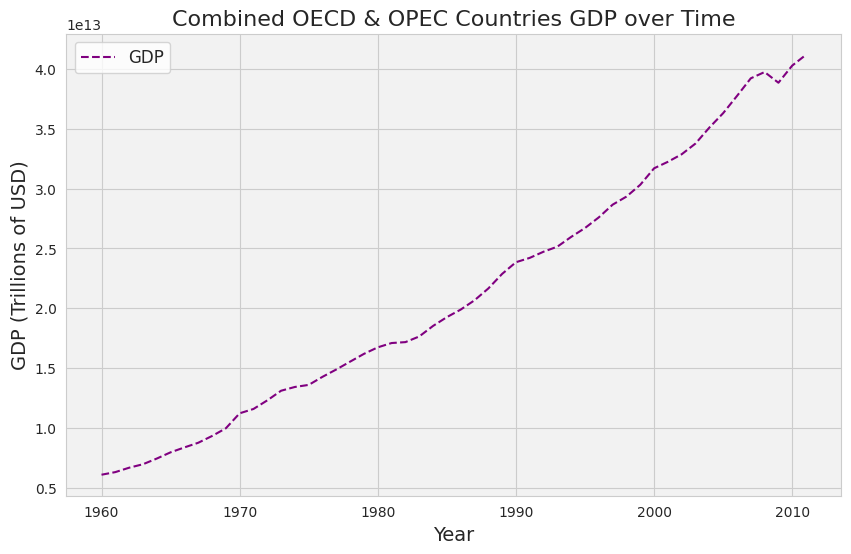

In [7]:
yearly_data = df.groupby('year')['gdp'].sum()

plt.figure(figsize=(10,6))
plt.plot(yearly_data.index, yearly_data.values, color='purple', linestyle='--')
plt.title('Combined OECD & OPEC Countries GDP over Time', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('GDP (Trillions of USD)', fontsize=14)
plt.grid(True)
plt.legend(['GDP'], loc='upper left', fontsize=12)
plt.gca().set_facecolor('#F2F2F2')
plt.show()


<AxesSubplot: xlabel='continent', ylabel='fertility'>

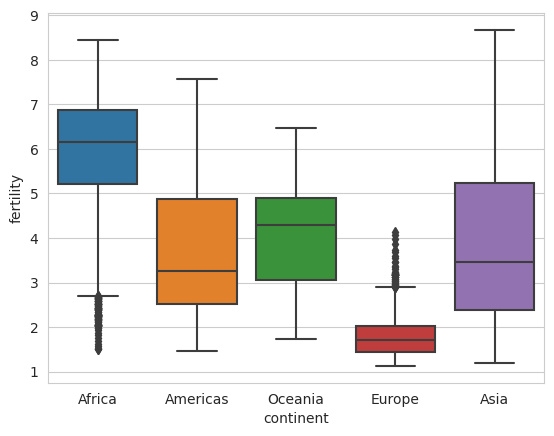

In [8]:
sns.boxplot(x='continent', y='fertility', data=df)

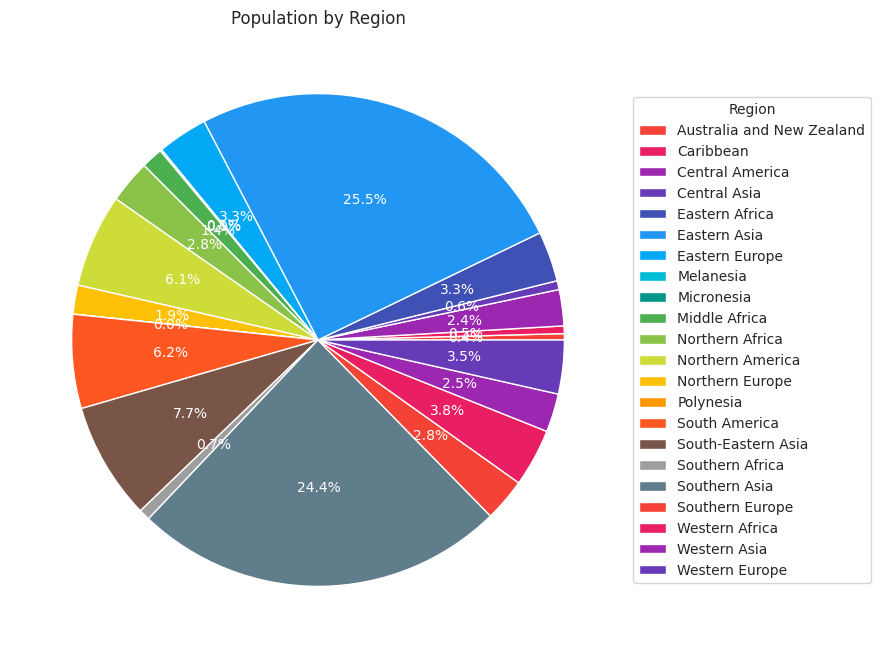

In [9]:
region_data = df.groupby('region')['population'].sum()
fig, ax = plt.subplots(figsize=(8, 8))
colors = ['#F44336', '#E91E63', '#9C27B0', '#673AB7', '#3F51B5', '#2196F3', '#03A9F4', '#00BCD4', '#009688', '#4CAF50', '#8BC34A', '#CDDC39', '#FFC107', '#FF9800', '#FF5722', '#795548', '#9E9E9E', '#607D8B']
wedges, texts, autotexts = ax.pie(region_data, colors=colors, autopct='%1.1f%%', textprops=dict(color="w"))
ax.legend(wedges, region_data.index, title='Region', loc='center left', bbox_to_anchor=(1, 0, 0.5, 1))
ax.set_title('Population by Region')
ax.set_ylabel('')
plt.show()


/tmp/ipykernel_20/2957210155.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['gdp'], shade=True, color='blue')


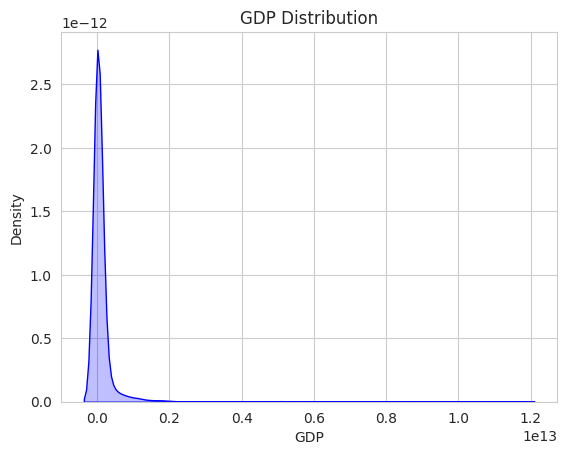

In [10]:
sns.kdeplot(df['gdp'], shade=True, color='blue')
plt.title('GDP Distribution')
plt.xlabel('GDP')
plt.ylabel('Density')
plt.show()

/tmp/ipykernel_20/1175292176.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


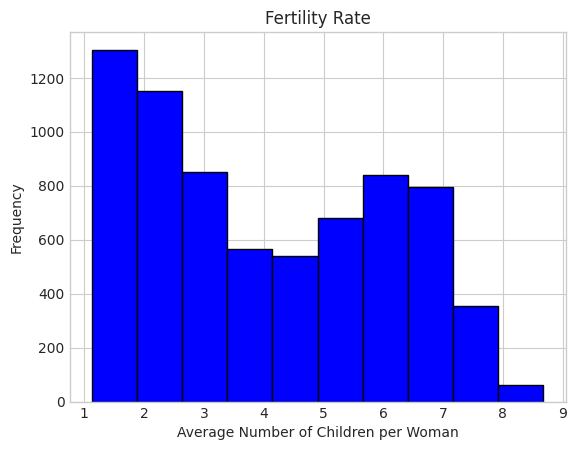

In [11]:
plt.style.use('seaborn-whitegrid')
plt.hist(df['fertility'], color='blue', edgecolor='black')
plt.title('Fertility Rate')
plt.xlabel('Average Number of Children per Woman')
plt.ylabel('Frequency')

plt.show()

In [12]:
df = pd.read_csv('/kaggle/input/health-and-income-outcomes/gapminder.csv')
gdp_data = df.groupby('country')['gdp'].sum().reset_index()
world_map = folium.Map(location=[0, 0], zoom_start=2)
folium.Choropleth(
    geo_data='/kaggle/input/text-files-related-to-national-anthem-clustering/world-countries.json',
    name='GDP',
    data=gdp_data,
    columns=['country', 'gdp'],
    key_on='feature.properties.name',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='GDP'
).add_to(world_map)
folium.LayerControl().add_to(world_map)
world_map.save('gdp_map.html')
world_map
